Understanding Financial Well-Being: Factors Influencing Stability and Resilience Among Americans

The aim of this project is to analyze the factors influencing the financial stability of Americans. To accomplish this, we have outlined the following objectives:

1. Determine the crucial elements impacting financial well-being, such as financial literacy.
2. Investigate how these elements contribute to financial stability.
3. Assess the influence of education, income, and demographics on financial well-being.
4. Identify groups particularly vulnerable to financial instability.
5. Offer insights to guide potential interventions.

The data to be used in this study is based on online survey  conducted by Consumer Financial Protection Bureau on the financial well being pf average Americans 

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from scipy import stats


In [188]:
path='NFWBS_PUF_2016_data.csv'
wellbeing_data=pd.read_csv(path)

let gain some basic insight into our data 

In [189]:
wellbeing_data.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [53]:
wellbeing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


This data has over 6000 entries and 217 features and does not have any null values. To meeet our goal as required in the project we are going to identify the releavant paramaters that will aid our analysis
The main parmaeter in our data sets that indicates the financial wellbeing is indicated by the financial weall being score. This is denoted by the FWBScore in the dataset. The higher it is the higher the financial well being and vice versa. 
Using this as our target variable we are going to use regression tress to identify the variables that have the greatest impact on the financial well being score.
We are going to utilize domain knowledge to furhter narrow down the features relevant to our analysis


let's start by getting a feel of the distribution of the well being score

Text(0, 0.5, 'Count')

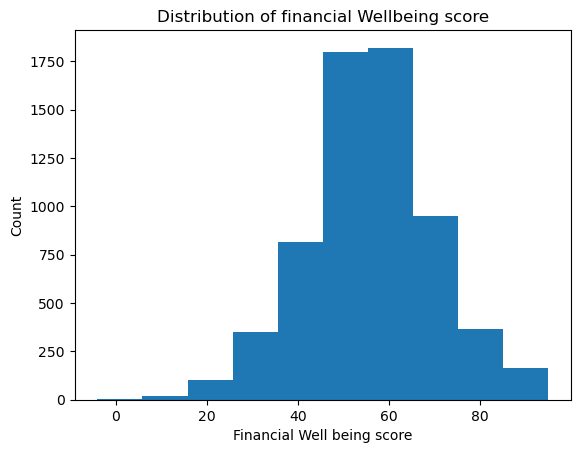

In [190]:
plt.hist(wellbeing_data['FWBscore'])
plt.title('Distribution of financial Wellbeing score')
plt.xlabel('Financial Well being score')
plt.ylabel('Count')

As expected most Americans have decent financial wellbeing score with the distribution skewed towards the right

In [191]:
X_train=wellbeing_data.drop(columns='FWBscore')
y_train=wellbeing_data['FWBscore']
regression_tree = DecisionTreeRegressor()
regression_tree.fit(X_train, y_train)

# Get feature importance
feature_importances = regression_tree.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in range(10):
    print(f"Feature {idx+1}: Importance = {feature_importances[idx]}")

Feature 1: Importance = 0.00034349338704412315
Feature 2: Importance = 0.00012606190040712615
Feature 3: Importance = 3.5360120327067266e-05
Feature 4: Importance = 0.00019646070406536002
Feature 5: Importance = 0.0004741614211001994
Feature 6: Importance = 0.00013194987757613033
Feature 7: Importance = 0.002781437718295531
Feature 8: Importance = 0.019528685945406347
Feature 9: Importance = 0.08513964792429501
Feature 10: Importance = 0.022929774268173973


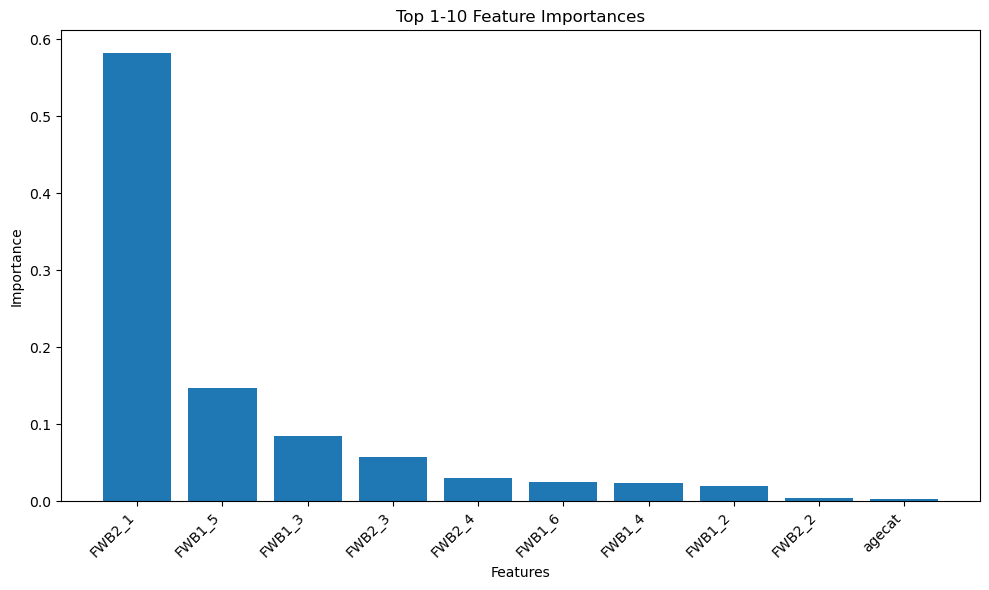

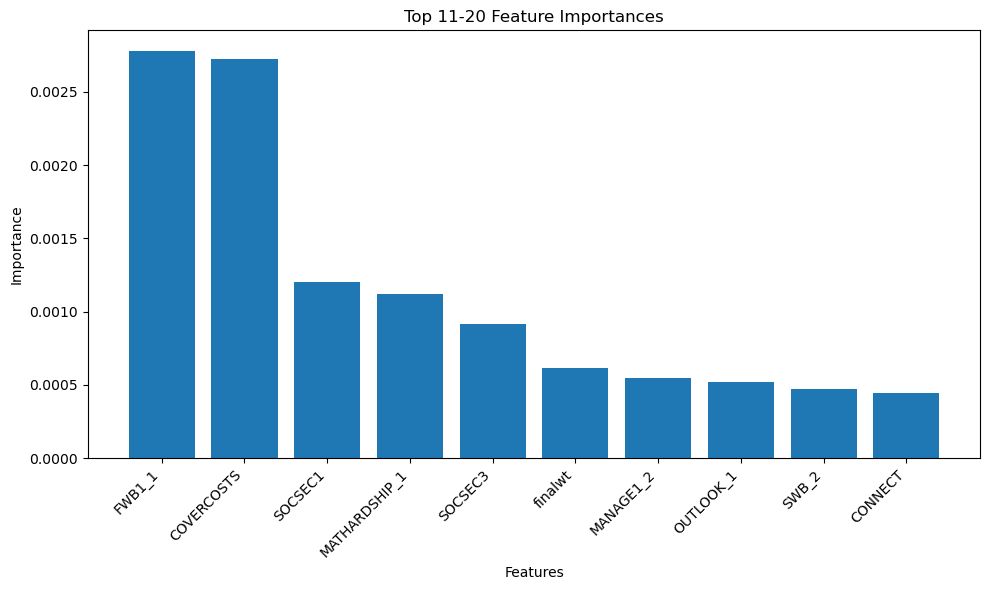

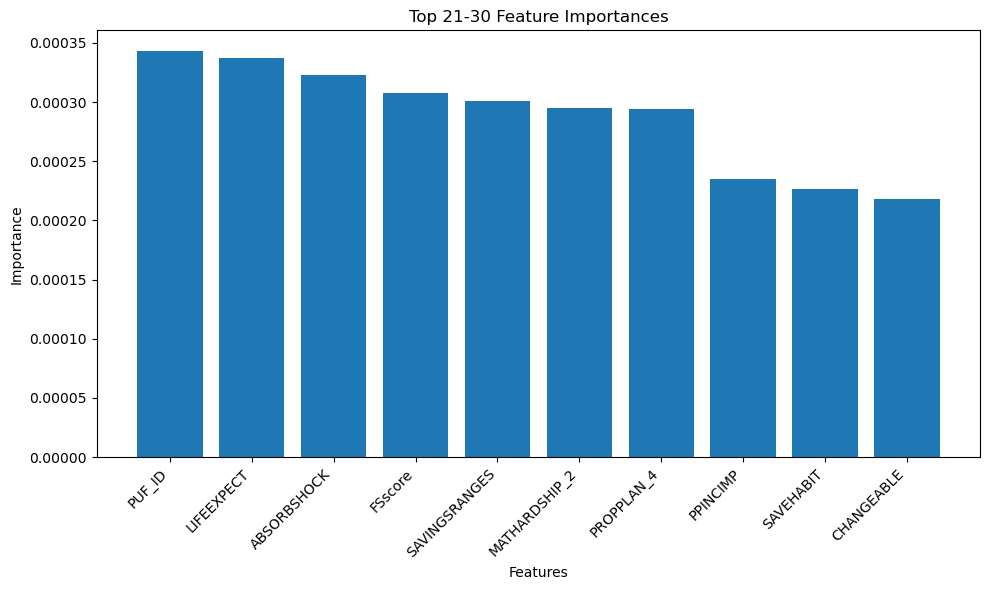

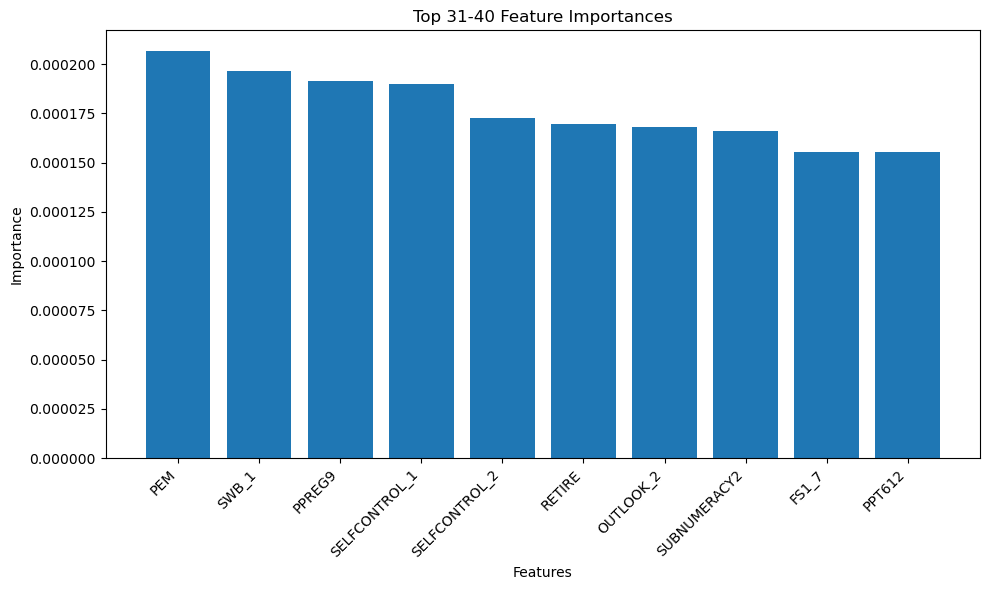

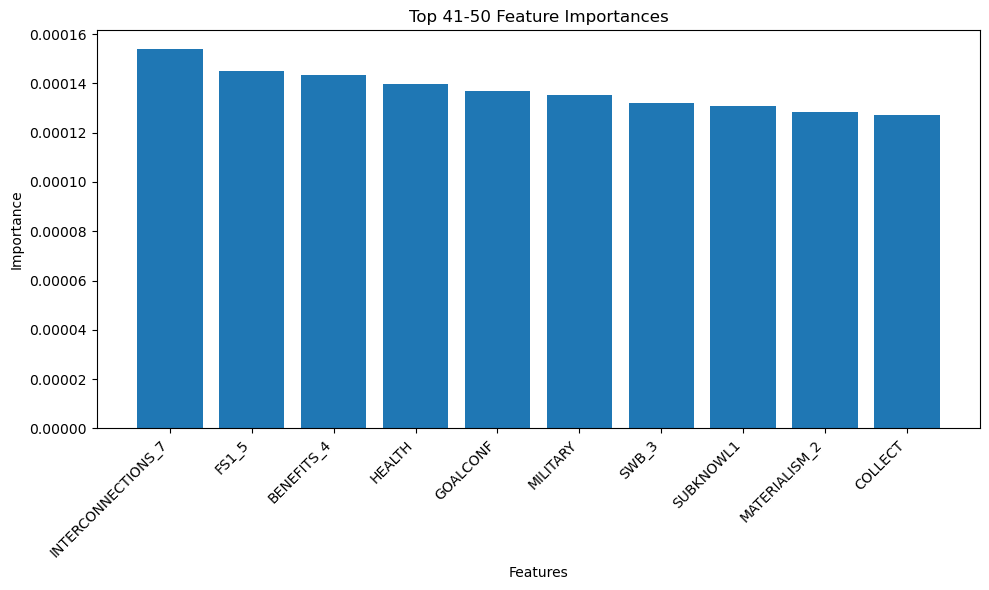

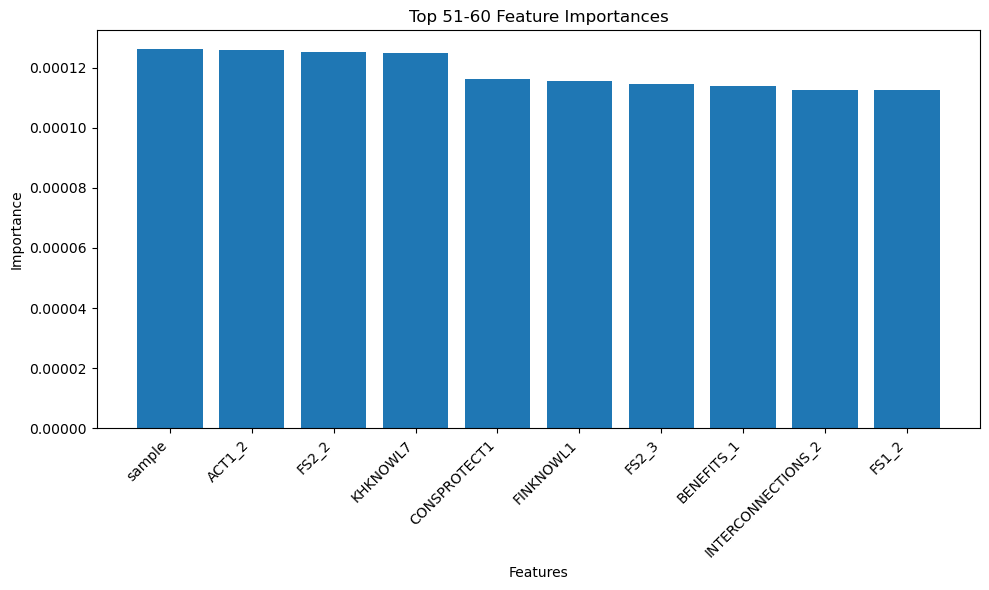

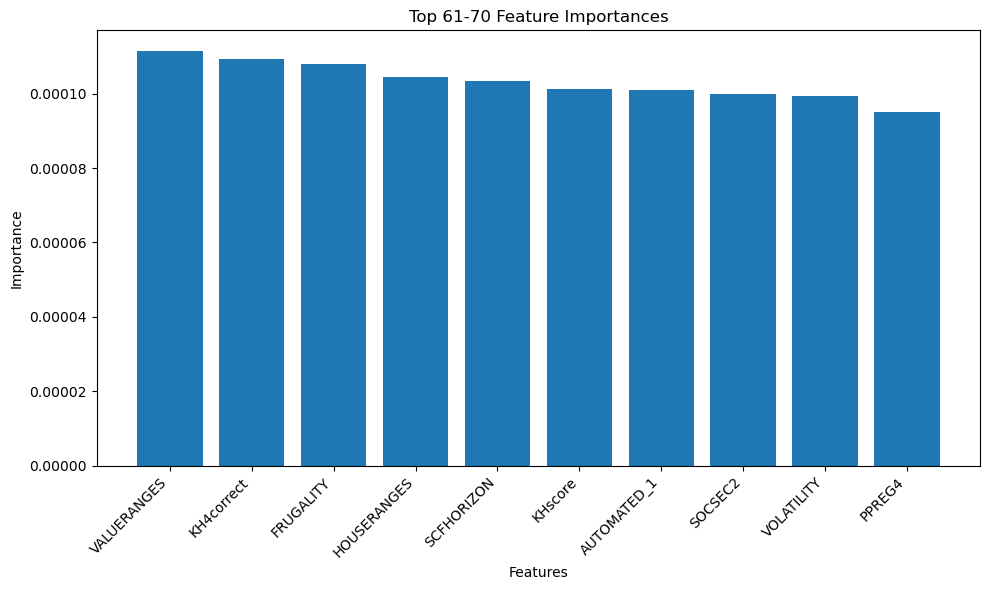

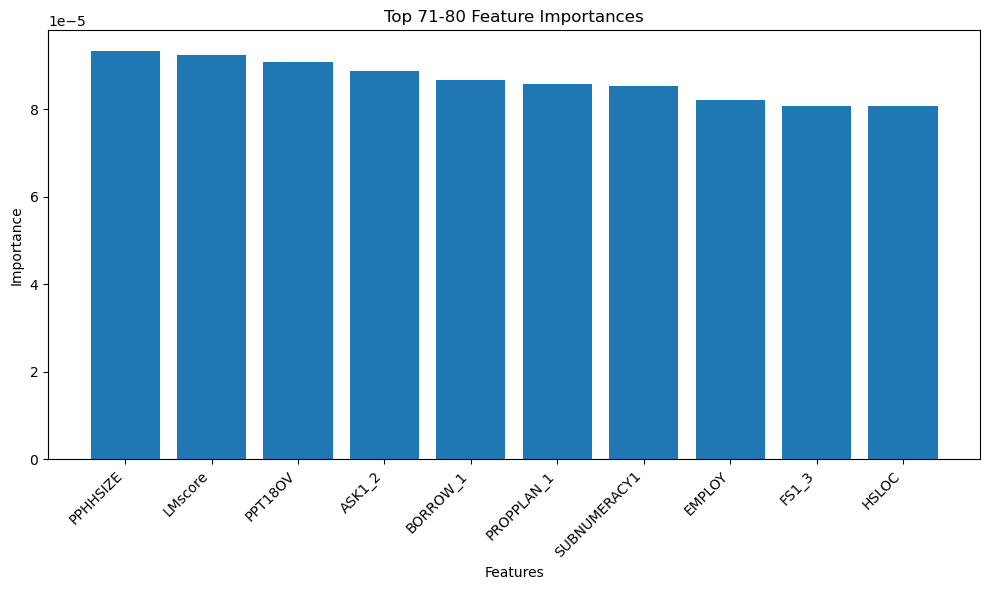

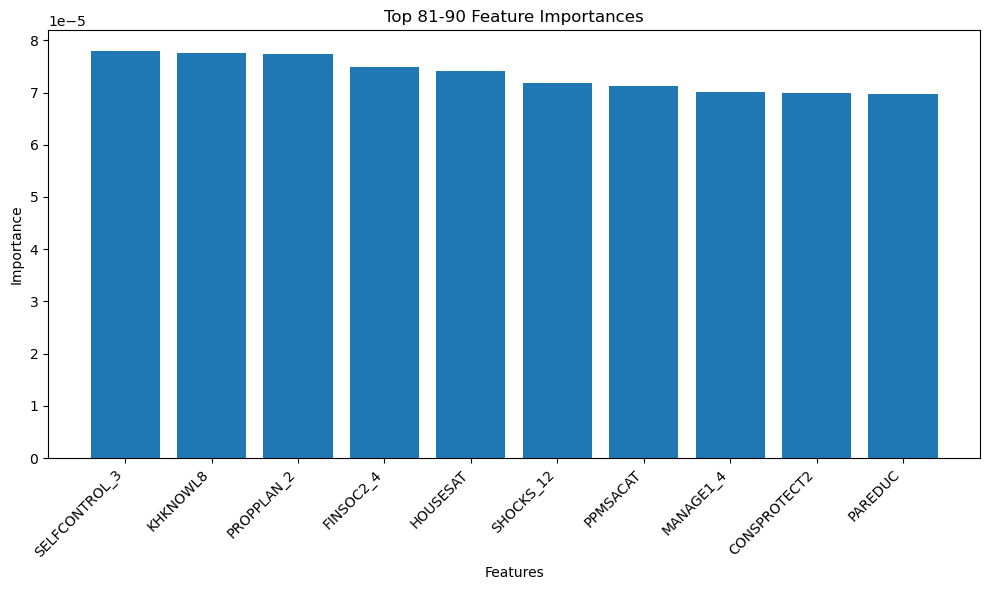

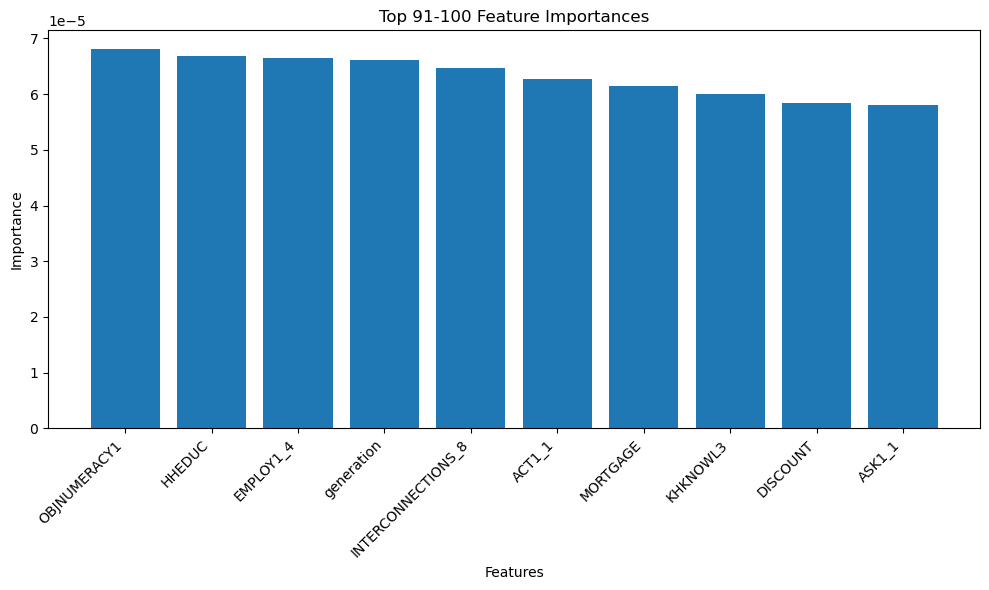

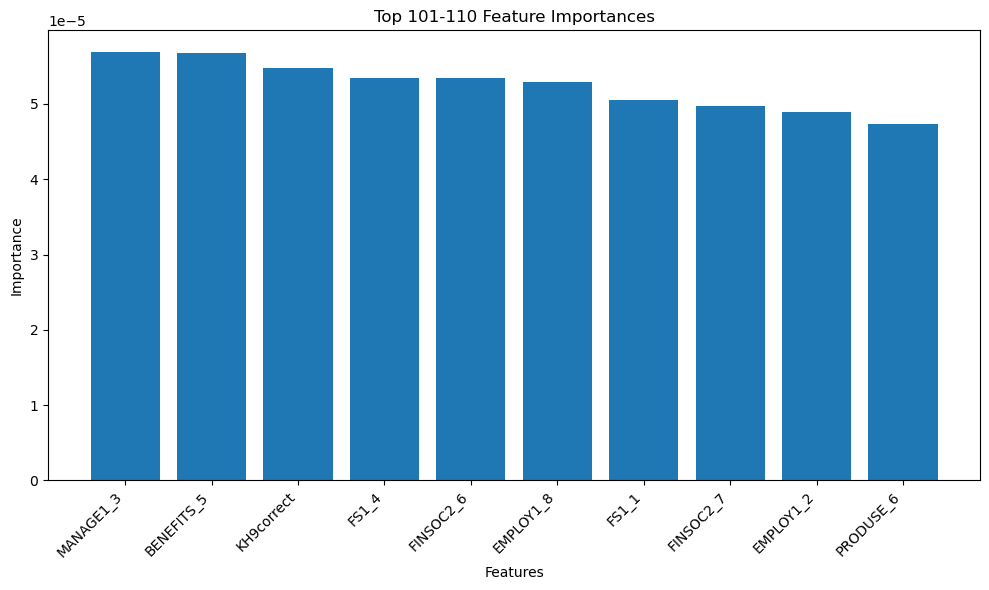

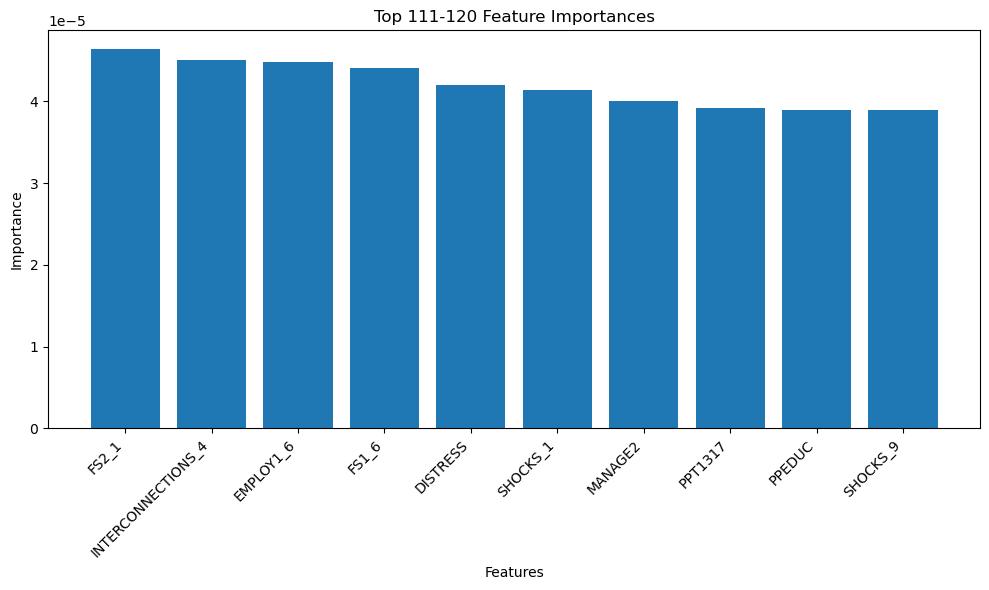

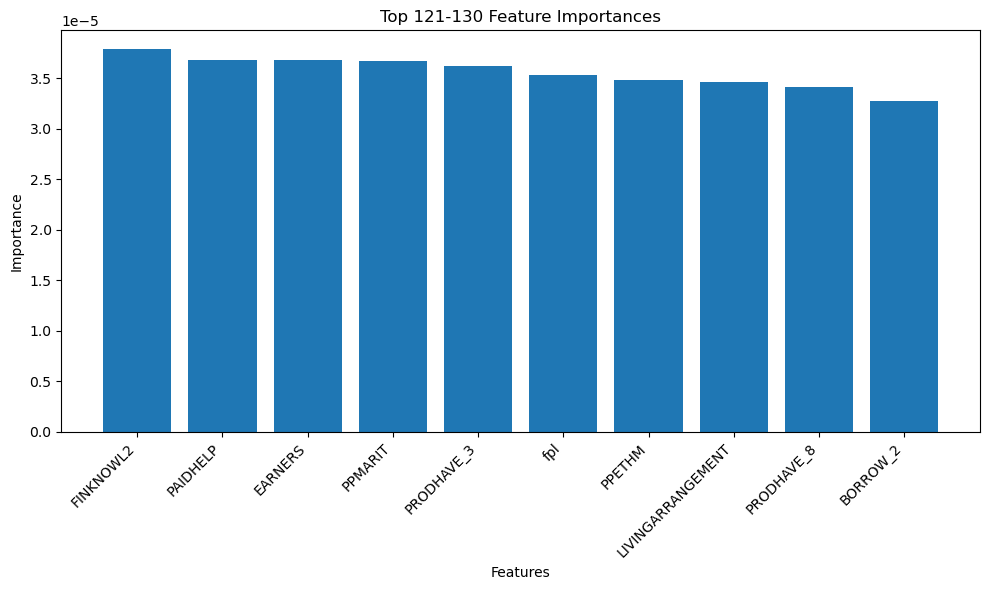

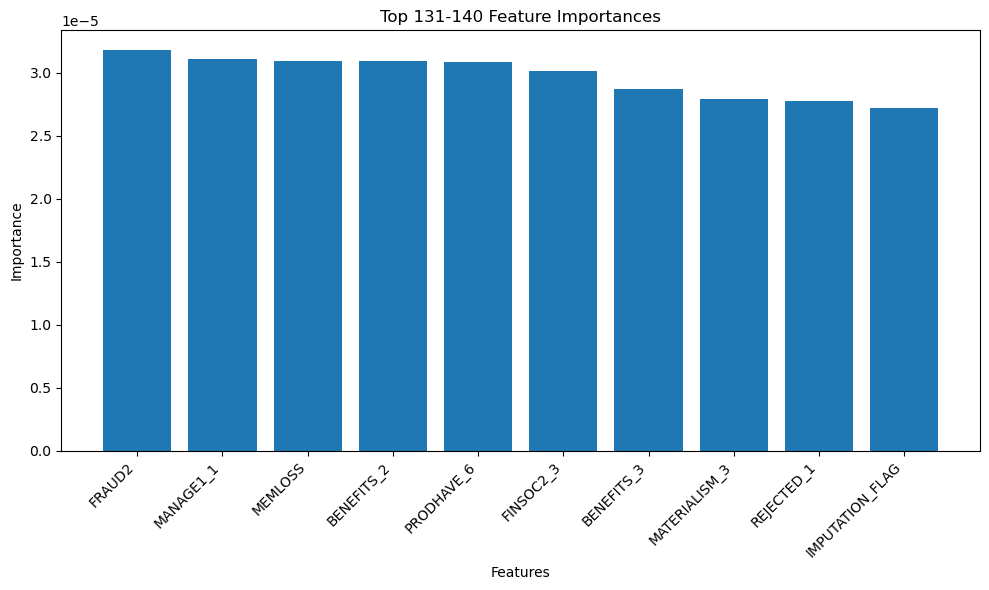

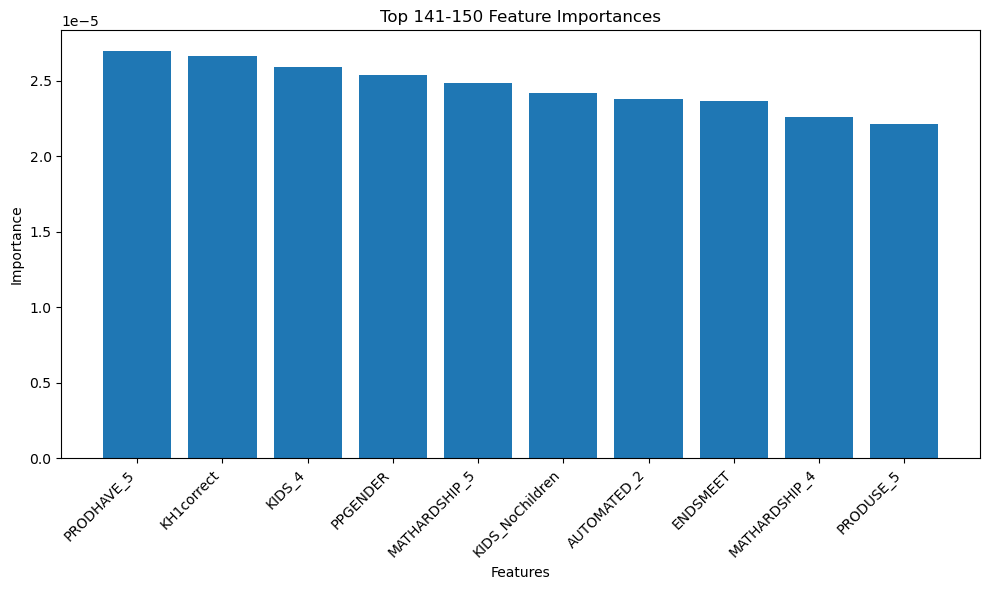

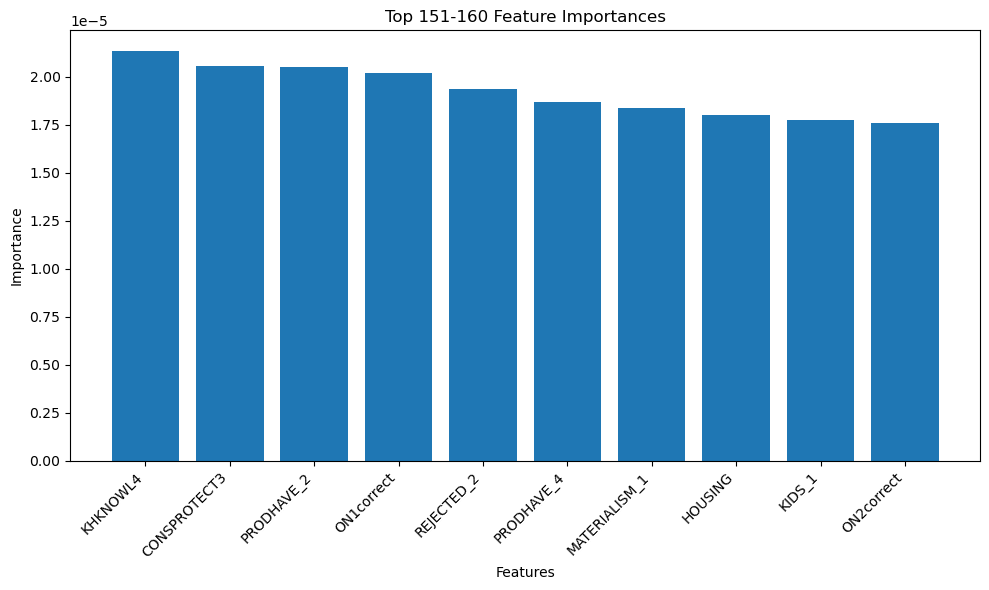

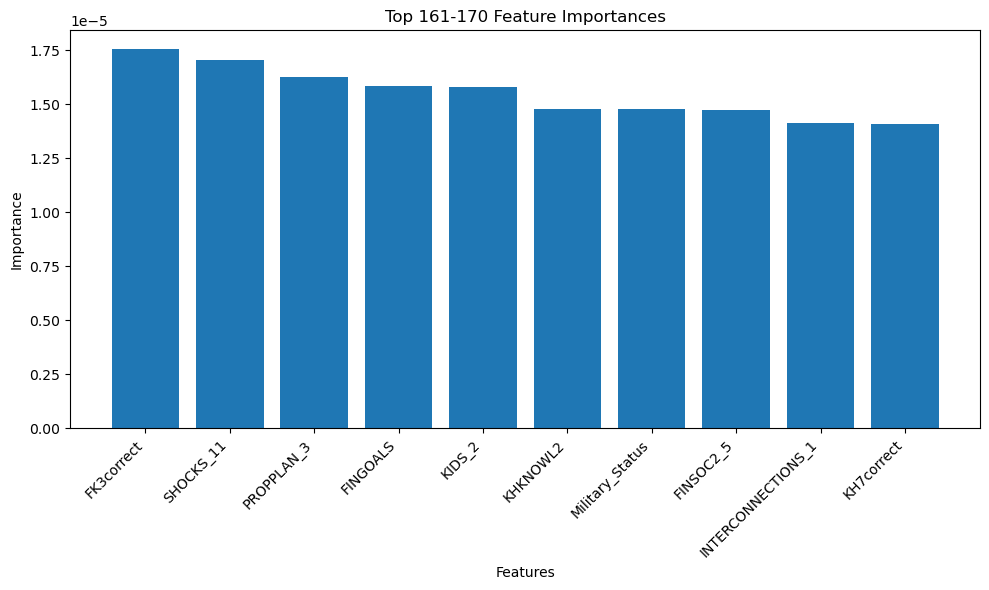

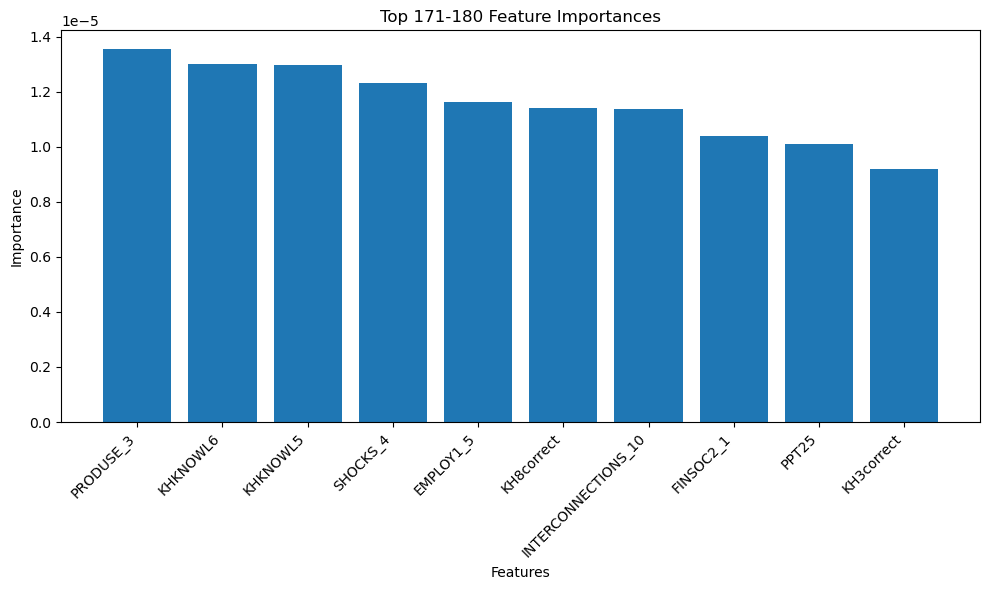

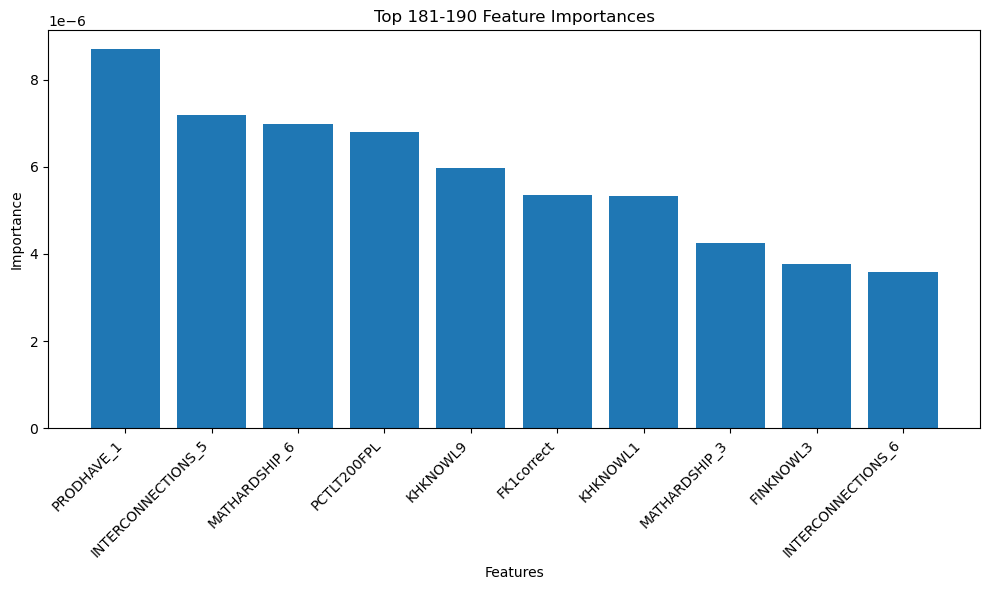

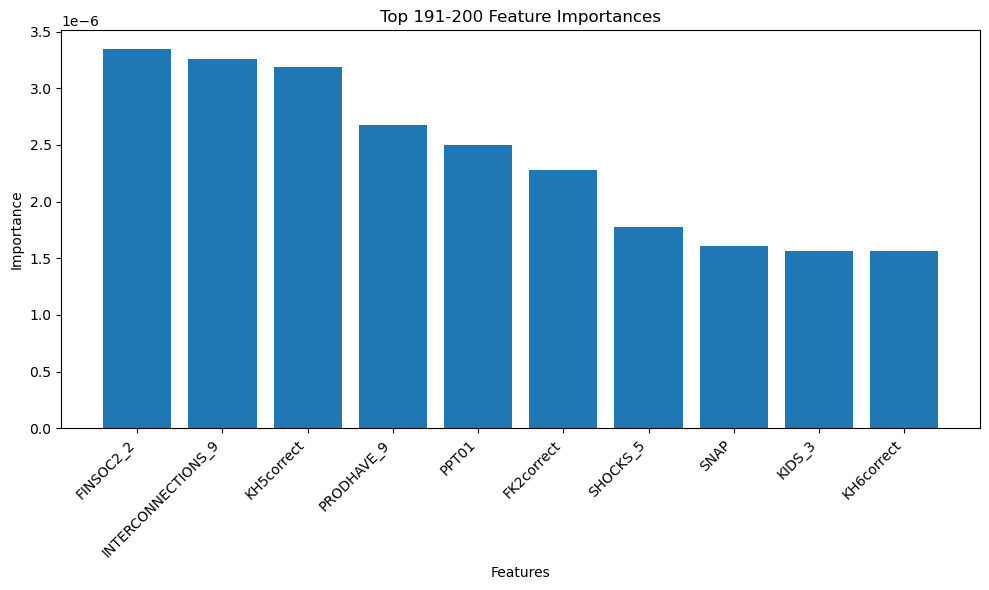

In [192]:

arr = np.arange(0, 200, 10)  # Starting indices for each plot
for start_index in arr:
    end_index = start_index + 10  # Ending index for each plot
    top_n = min(end_index, len(sorted_indices))  # Ensure we don't exceed the total number of features

    # Get top N feature importances and corresponding feature names
    top_feature_importances = feature_importances[sorted_indices[start_index:end_index]]
    top_feature_names = X_train.columns[sorted_indices[start_index:end_index]]

    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_feature_importances)), top_feature_importances, tick_label=top_feature_names)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Top {start_index+1}-{top_n} Feature Importances')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

It is important to note that this survey consists of survey questions and this greatly impacts the accuracy of the ranking of the feature importance. Take for example the features FWB2_2 to FWB2_1. These are actually  survey questions that are used to estimate the financial well being score and thus naturally as we can see has very high correlation with the Financial well being score but nonetheless are redundant pieces of information. For this reason we are going utilize domain knowledge of the data to further narrow down the relevant features 



In [253]:
df=wellbeing_data[['FSscore','KHscore','LMscore',
                   'HEALTH','PPMARIT','PPINCIMP',
                   'PPGENDER','PPETHM',
                   'PPEDUC','agecat',
                   'EMPLOY',
                   'HEALTH','PAREDUC',
                   'MEMLOSS','SOCSEC1',
                   'SOCSEC2','CONSPROTECT1',
                   'PPREG9','FWBscore']]
df.head()
                   
                   

,FSscore,KHscore,LMscore,HEALTH,PPMARIT,PPINCIMP,PPGENDER,PPETHM,PPEDUC,agecat,EMPLOY,HEALTH,PAREDUC,MEMLOSS,SOCSEC1,SOCSEC2,CONSPROTECT1,PPREG9,FWBscore
0,44,1.267,3,2,3,7,1,1,4,8,8,2,4,0,1,62,3,8,55
1,43,-0.570,3,3,3,6,1,1,2,3,2,3,2,0,-2,-2,2,3,51
2,42,-0.188,3,3,3,6,1,2,3,3,2,3,3,0,-2,-2,3,9,49
3,42,-1.485,2,-1,3,8,1,1,2,3,99,-1,2,-1,-2,-2,-1,7,49
4,42,-1.900,1,3,1,7,1,3,2,2,2,3,2,1,-2,-2,3,4,49



In this stage of the analysis we are going to plot how the financial Knowledge  compares with the financial wedding

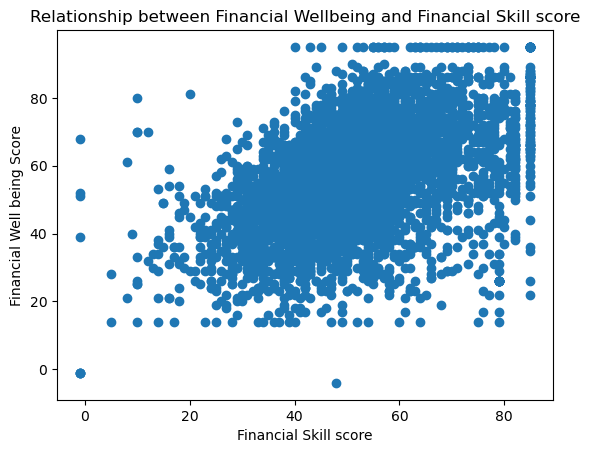

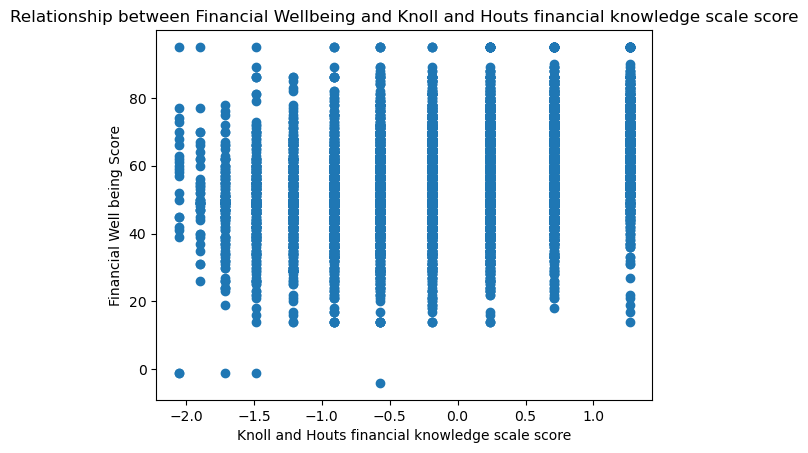

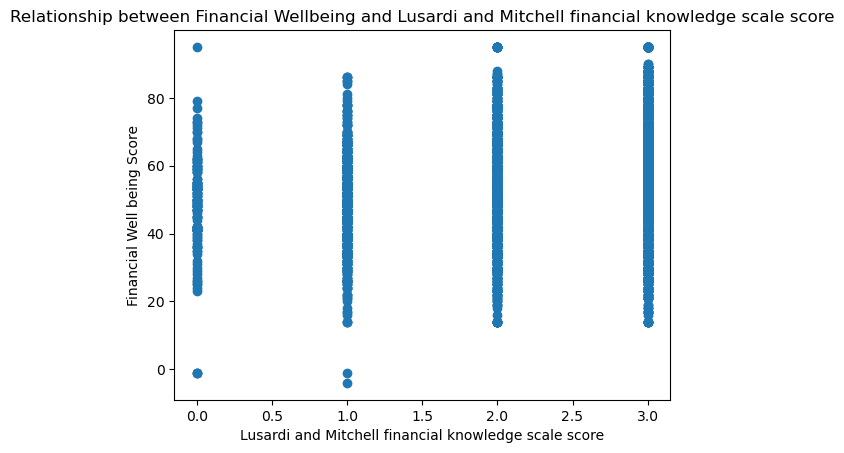

In [254]:

finscore=['FSscore','KHscore','LMscore']
title_names=['Financial Skill score','Knoll and Houts financial knowledge scale score','Lusardi and Mitchell financial knowledge scale score']

for k, v in zip(finscore, title_names):
    plt.scatter(x=df[k], y=df['FWBscore'])
    plt.title(f'Relationship between Financial Wellbeing and {v}')
    plt.xlabel(f'{v}')
    plt.ylabel('Financial Well being Score')
    plt.show()

The scatter plot shows a positive correlation between the financial well being score and financial skill but there seems to be no correlation with financial well being with financial knowledge.
We are going to conduct A/B testing to further validate we are going to check if there is any sort of correlation between financial skills and financial knowledge

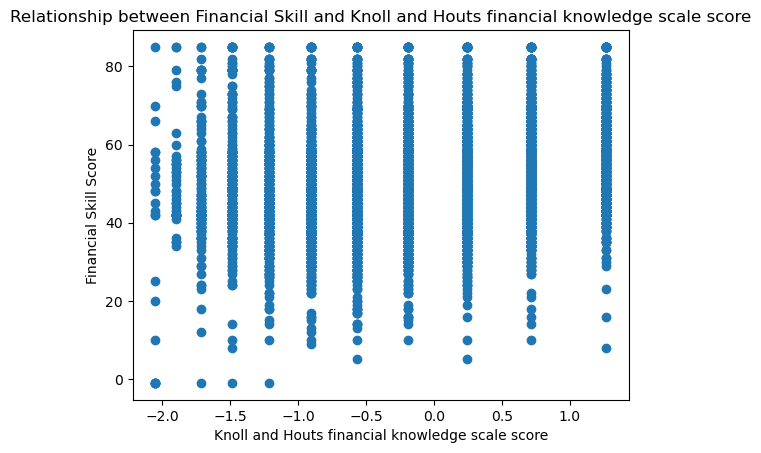

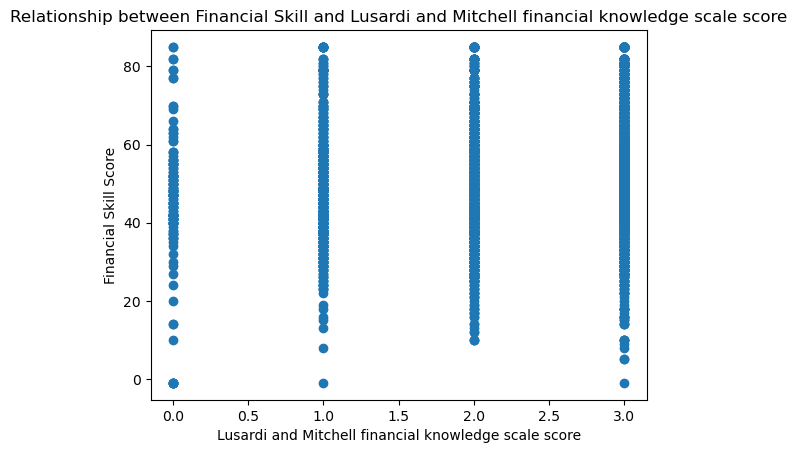

In [255]:
finscore=['KHscore','LMscore']
title_names=['Knoll and Houts financial knowledge scale score','Lusardi and Mitchell financial knowledge scale score']

for k, v in zip(finscore, title_names):
    plt.scatter(x=df[k], y=df['FSscore'])
    plt.title(f'Relationship between Financial Skill and {v}')
    plt.xlabel(f'{v}')
    plt.ylabel('Financial Skill Score')
    plt.show()

It seems there is also seems that there is no correlation between financial skill and financial knowledge.

Let's plot the financial skill score distribution for Americans

(array([  10.,   33.,   57.,  297.,  904., 1984., 1866.,  620.,  334.,
         289.]),
 array([-1. ,  7.6, 16.2, 24.8, 33.4, 42. , 50.6, 59.2, 67.8, 76.4, 85. ]),
 <BarContainer object of 10 artists>)

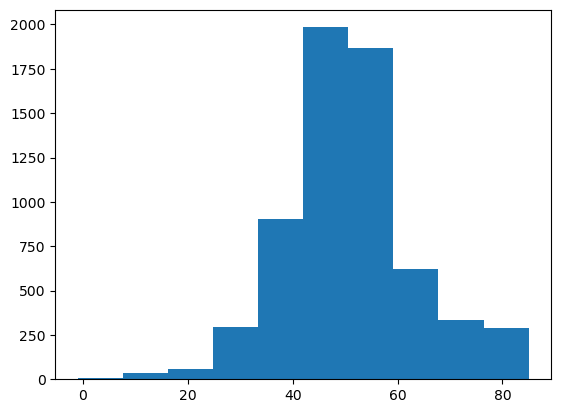

In [256]:
plt.hist(df['FSscore'])

Interesitngly just lime the financial well being sccore the distribution  is skewed towards  the right

We are going to conduct A and B testing to see  if financial skil actually affects financial well being

In [197]:
Average_financial_skill_score=df['FSscore'].mean()
group_A=df[df['FSscore']<=Average_financial_skill_score]
group_B=df[df['FSscore']>Average_financial_skill_score]
print(f'lenth of group A {len(group_A)} lenth of group B {len(group_B)}')

lenth of group A 3285 lenth of group B 3109


Since the lenght of the groups is roughly the same we can start with the A and B testing



In [257]:
t_statistic, p_value = stats.ttest_ind(group_A['FWBscore'], group_B['FWBscore'],permutations=10000)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in financial well-being scores between the two groups.")
else:
    print("There is no significant difference in financial well-being scores between the two groups.")

T-statistic: -37.14420869147525
P-value: 9.999000099990002e-05
There is a significant difference in financial well-being scores between the two groups.


C:\Users\HP\AppData\Local\Temp\ipykernel_12608\1894139594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_age['agecat']= group_by_age['agecat'].map(age_mapping)


Text(0, 0.5, 'Financial well being score')

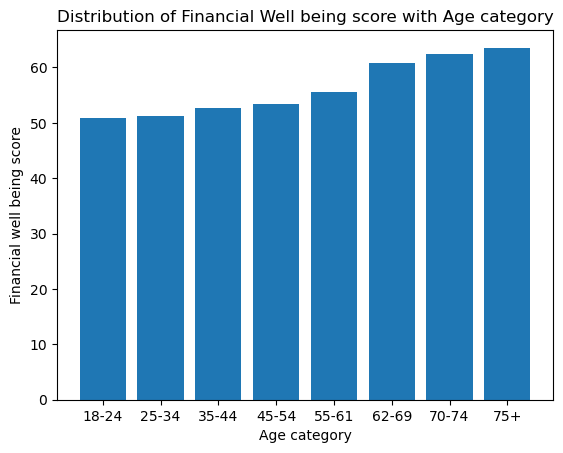

In [258]:


group_by_age=df[['agecat','FWBscore']]
age_mapping = {
    1: '18-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '55-61',
    6: '62-69',
    7: '70-74',
    8: '75+'
}

group_by_age['agecat']= group_by_age['agecat'].map(age_mapping)
group_by_age=group_by_age.groupby('agecat')['FWBscore'].mean().reset_index()
plt.bar(group_by_age['agecat'],group_by_age['FWBscore'])
plt.title('Distribution of Financial Well being score with Age category')
plt.xlabel('Age category')
plt.ylabel('Financial well being score')

It seems that the financial well being does not really change with change. However it is noteworthy to note that the financil well being gradually increases with age

In [259]:
race_mapping = {
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    3: 'Other, Non-Hispanic',
    4: 'Hispanic'
}
df['PPETHM'] = df['PPETHM'].replace(race_mapping)
race_df = df.copy()


race_df['PPETHM'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_12608\1493236896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPETHM'] = df['PPETHM'].replace(race_mapping)


PPETHM
White, Non-Hispanic    4498
Hispanic                875
Black, Non-Hispanic     685
Other, Non-Hispanic     336
Name: count, dtype: int64

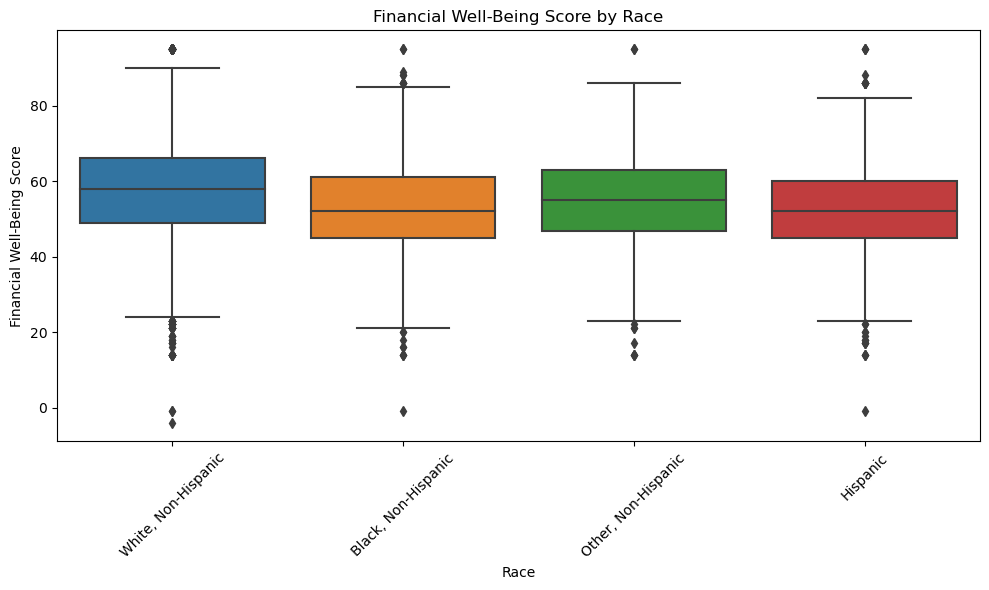

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PPETHM', y='FWBscore', data=race_df)
plt.title('Financial Well-Being Score by Race')
plt.xlabel('Race')
plt.ylabel('Financial Well-Being Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The box plot shows the following order in the financial well being distribution is higher for the whites followed bvy other then blacks and the last is the hispanics

let's see  the distribution of the financial well being score with education level

In [261]:
edu_mapping={
    1: 'Less than high school',
    2: 'High school degree/GED',
    3: 'Some college/Associate',
    4: 'Bachelors degree',
    5: 'Graduate/professional degree'
}
df['PPEDUC']=df['PPEDUC'].map(edu_mapping)
edu_df=df.copy()

edu_df=edu_df.groupby('PPEDUC')['FWBscore'].mean().reset_index()
edu_df = edu_df.sort_values(by='FWBscore', ascending=True)
edu_df


C:\Users\HP\AppData\Local\Temp\ipykernel_12608\3408074125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPEDUC']=df['PPEDUC'].map(edu_mapping)


,PPEDUC,FWBscore
3,Less than high school,48.097902
2,High school degree/GED,53.914920
4,Some college/Associate,54.291774
0,Bachelors degree,58.948171
1,Graduate/professional degree,61.850638


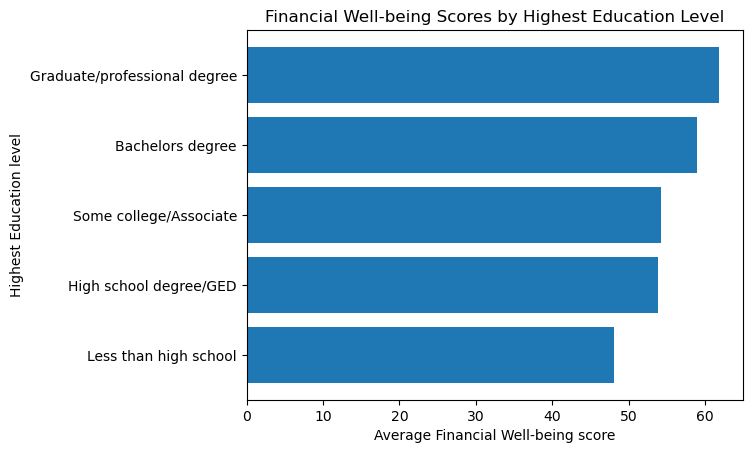

In [262]:
plt.barh(edu_df['PPEDUC'],edu_df['FWBscore'] )

# Add labels and title
plt.xlabel('Average Financial Well-being score')
plt.ylabel('Highest Education level')
plt.title('Financial Well-being Scores by Highest Education Level')

# Show plot
plt.show()

The average financial well-being score increases with the highest education level 

Let's see the distribution of financial-well being score  between the two genders male and female

In [263]:
gender_mapping={
    1:'Male',
    2:'Female'}
df['PPGENDER']=df['PPGENDER'].replace(gender_mapping)
gen_df=df.copy()
gender_count = gen_df.groupby('PPGENDER').size()
gender_count


C:\Users\HP\AppData\Local\Temp\ipykernel_12608\1414557127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPGENDER']=df['PPGENDER'].replace(gender_mapping)


PPGENDER
Female    3042
Male      3352
dtype: int64

Text(0.5, 1.0, 'Distribution of Men and Women in the Survey')

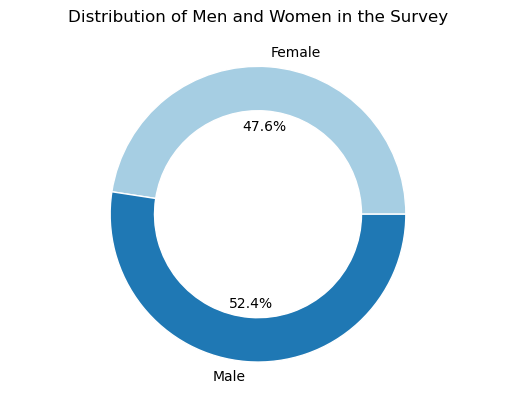

In [264]:
labels = gender_count.index
sizes = gender_count.values

# Create a figure and two subplots (one for the pie chart, one for the donut hole)
fig, ax = plt.subplots()
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Outer pie chart (donut)
outer_colors = plt.cm.Paired(range(len(labels)))
ax.pie(sizes, labels=labels, radius=1, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='w'),autopct='%1.1f%%')

# Inner pie chart (hole)
ax.pie([1], radius=0.7, colors='w')  # Draw a white circle at the center to create the hole

# Add a circle at the center to make it look better
center_circle = plt.Circle((0, 0), 0.5, color='white', linewidth=0)
ax.add_artist(center_circle)

# Add a title
plt.title('Distribution of Men and Women in the Survey')

# Show plot

<BarContainer object of 2 artists>

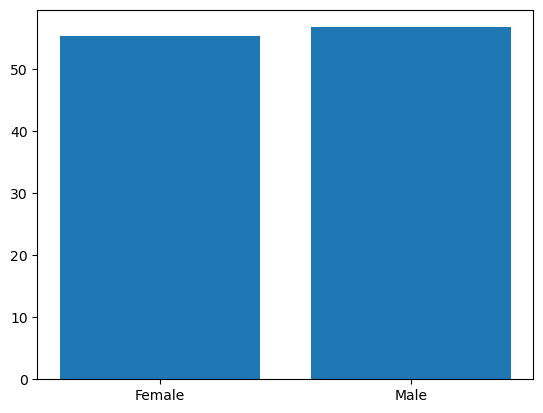

In [265]:
gen_FWB_score=gen_df.groupby('PPGENDER')['FWBscore'].mean().reset_index()
gen_FWB_score.columns=['Gender','Averge Financial Well-being Score']

gen_FWB_score
plt.bar(gen_FWB_score['Gender'],gen_FWB_score['Averge Financial Well-being Score'])

Let's see how the  distribution of the financial well being socre of each gender 

<Axes: xlabel='PPGENDER', ylabel='FWBscore'>

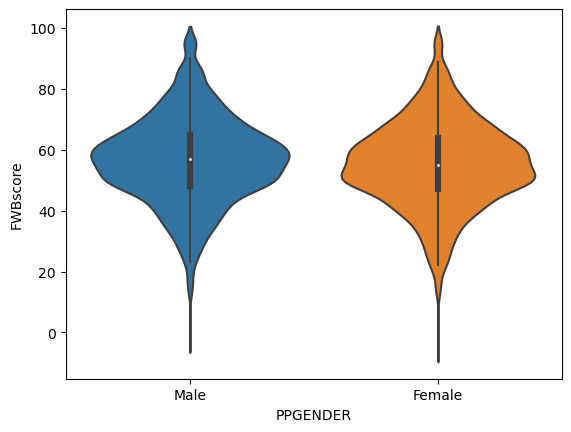

In [266]:
sns.violinplot(x='PPGENDER', y='FWBscore', data=gen_df)

Men have slightly higer well being score. We are going to do A and B testing to see if this has any significance

In [267]:

group_male=gen_df[gen_df['PPGENDER']=='Male']
group_female=gen_df[gen_df['PPGENDER']=='Female']

t_statistic, p_value = stats.ttest_ind(group_male['FWBscore'], group_female['FWBscore'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in financial well-being scores between the two groups.")
else:
    print("There is no significant difference in financial well-being scores between the two groups.")


T-statistic: 4.142670624079321
P-value: 3.477115763687222e-05
There is a significant difference in financial well-being scores between the two groups.


Despite the slight difference in average financial well being the difference between them is significant with the female gender having the lower
score. 

We have identified that there is clearly difference in financial well being of adult of Americans based on ethnicity and gender.
We also noted that education and financial skill greatly impacts the financial well being of an individual. So we  are  going to see how these factors 
is distributed based on race and gender

Text(0, 0.5, 'Financial Skill Score')

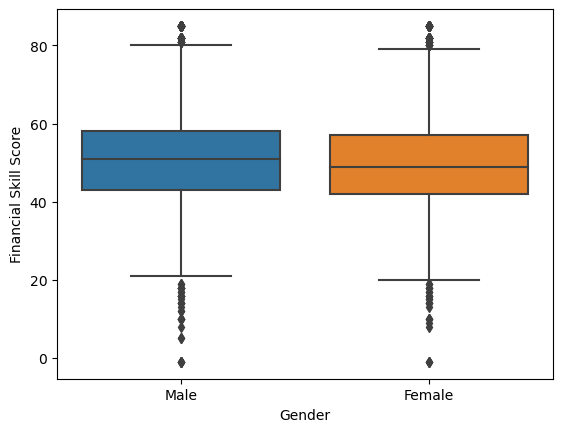

In [268]:
sns.boxplot(x='PPGENDER', y='FSscore', data=gen_df)
plt.xlabel('Gender')
plt.ylabel('Financial Skill Score')

Interesting the male gender have a higher financial skill score compared to the females

(array([0, 1, 2, 3]),
 [Text(0, 0, 'White, Non-Hispanic'),
  Text(1, 0, 'Black, Non-Hispanic'),
  Text(2, 0, 'Other, Non-Hispanic'),
  Text(3, 0, 'Hispanic')])

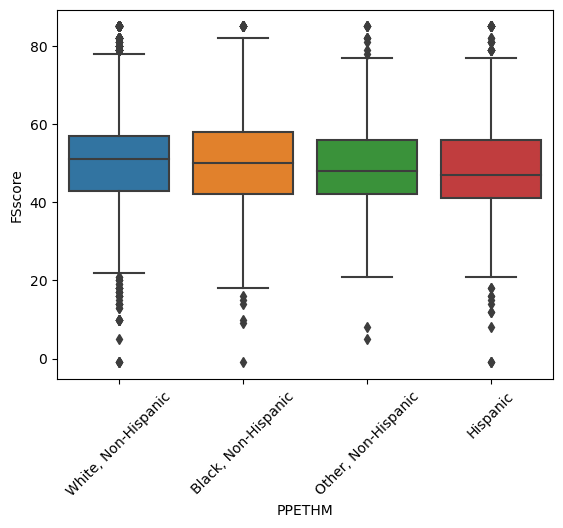

In [269]:
sns.boxplot(x='PPETHM', y='FSscore', data=race_df)
plt.xticks(rotation=45)

In this case we are going to see the distribution of the education level of both genders 

In [273]:
df.head()

,FSscore,KHscore,LMscore,HEALTH,PPMARIT,PPINCIMP,PPGENDER,PPETHM,PPEDUC,agecat,EMPLOY,HEALTH,PAREDUC,MEMLOSS,SOCSEC1,SOCSEC2,CONSPROTECT1,PPREG9,FWBscore
0,44,1.267,3,2,3,7,Male,"White, Non-Hispanic",Bachelors degree,8,8,2,4,0,1,62,3,8,55
1,43,-0.570,3,3,3,6,Male,"White, Non-Hispanic",High school degree/GED,3,2,3,2,0,-2,-2,2,3,51
2,42,-0.188,3,3,3,6,Male,"Black, Non-Hispanic",Some college/Associate,3,2,3,3,0,-2,-2,3,9,49
3,42,-1.485,2,-1,3,8,Male,"White, Non-Hispanic",High school degree/GED,3,99,-1,2,-1,-2,-2,-1,7,49
4,42,-1.900,1,3,1,7,Male,"Other, Non-Hispanic",High school degree/GED,2,2,3,2,1,-2,-2,3,4,49


In [279]:
male_count=len(df[df['PPGENDER']=='Male'])
female_count=len(df[df['PPGENDER']=='Female'])

edu_count_gender=df[['PPEDUC','PPGENDER']].copy()
edu_count_gender=edu_count_gender.groupby(['PPEDUC', 'PPGENDER']).size().reset_index()
edu_count_gender.columns = ['PPEDUC', 'Gender', 'Count']
edu_count_gender['Percentage'] = edu_count_gender.apply(lambda x: round(x['Count'] / (male_count if x['Gender'] == 'Male' else female_count) * 100, 2), axis=1)



print(male_count)
edu_count_gender

3352


,PPEDUC,Gender,Count,Percentage
0,Bachelors degree,Female,522,17.16
1,Bachelors degree,Male,790,23.57
2,Graduate/professional degree,Female,433,14.23
3,Graduate/professional degree,Male,665,19.84
4,High school degree/GED,Female,919,30.21
5,High school degree/GED,Male,703,20.97
6,Less than high school,Female,260,8.55
7,Less than high school,Male,169,5.04
8,Some college/Associate,Female,908,29.85
9,Some college/Associate,Male,1025,30.58


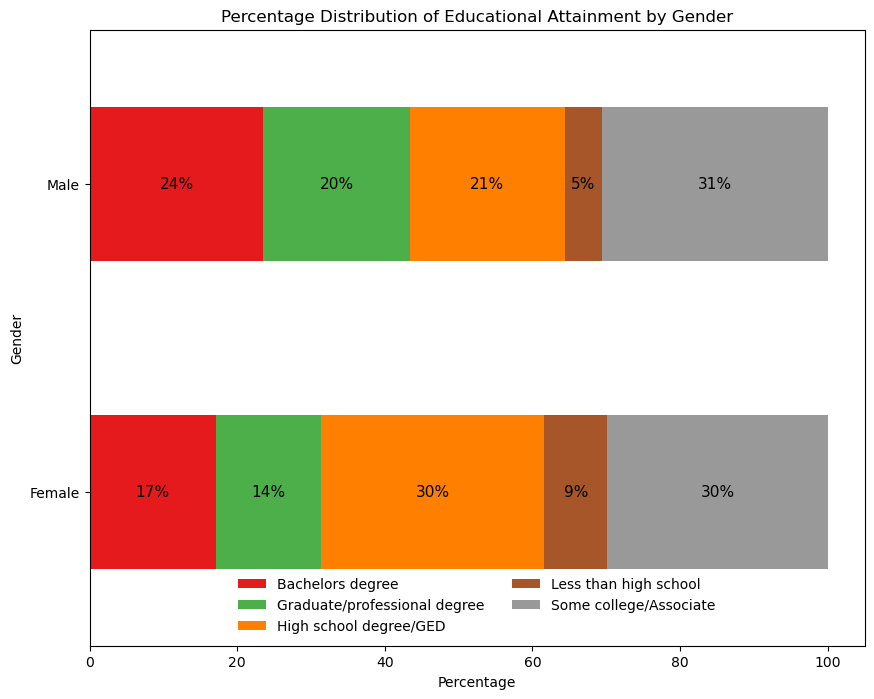

In [347]:

pivot_table = edu_count_gender.pivot_table(values="Percentage", index="Gender", columns=["PPEDUC"], aggfunc=sum)

pivot_table.plot(kind='barh',
                 stacked=True ,
                 colormap='Set1',
                 figsize=(10, 8),
                mark_right = True)

# Calculate the total count for each category
df_total = pivot_table["Bachelors degree"] + pivot_table["Graduate/professional degree"] + \
           pivot_table["High school degree/GED"] + pivot_table["Less than high school"] + \
           pivot_table["Some college/Associate"]

# Calculate relative percentages
df_rel = pivot_table.div(df_total, axis=0) * 100

# Iterate over each category
for n in df_rel.columns: 
    # Iterate over each row
    for i, (cs, ab, pc) in enumerate(zip(df_rel.cumsum(axis=1)[n], pivot_table[n], df_rel[n])): 
        # Add text annotations to the plot
        plt.text(cs - ab / 2, i, f"{pc:.0f}%", va='center', ha='center',fontsize=11)
        
plt.xlabel("Percentage")
plt.ylabel("Gender")  # Swap labels for horizontal bar chart
plt.title("Percentage Distribution of Educational Attainment by Gender")
plt.legend(frameon=False, loc='lower center', ncol=2)

# You might need to adjust other plot settings and labels according to your requirements


In [357]:
# Counting occurrences for each racial/ethnic group
white_count = len(df[df['PPETHM'] == 'White, Non-Hispanic'])
black_count = len(df[df['PPETHM'] == 'Black, Non-Hispanic'])
other_count = len(df[df['PPETHM'] == 'Other, Non-Hispanic'])
hispanic_count = len(df[df['PPETHM'] == 'Hispanic'])

# Creating a copy of the dataframe for further manipulation
edu_count_race = df[['PPEDUC', 'PPETHM']].copy()

# Grouping by education level and racial/ethnic group, and calculating counts
edu_count_race = edu_count_race.groupby(['PPEDUC', 'PPETHM']).size().reset_index()
edu_count_race.columns = ['PPEDUC', 'PPETHM', 'Count']

# Calculating percentage within each racial/ethnic group
for eth in ['White, Non-Hispanic', 'Black, Non-Hispanic', 'Other, Non-Hispanic', 'Hispanic']:
    total_count = len(df[df['PPETHM'] == eth])
    edu_count_race.loc[edu_count_race['PPETHM'] == eth, 'Percentage'] = \
        edu_count_race.loc[edu_count_race['PPETHM'] == eth, 'Count'] / total_count * 100


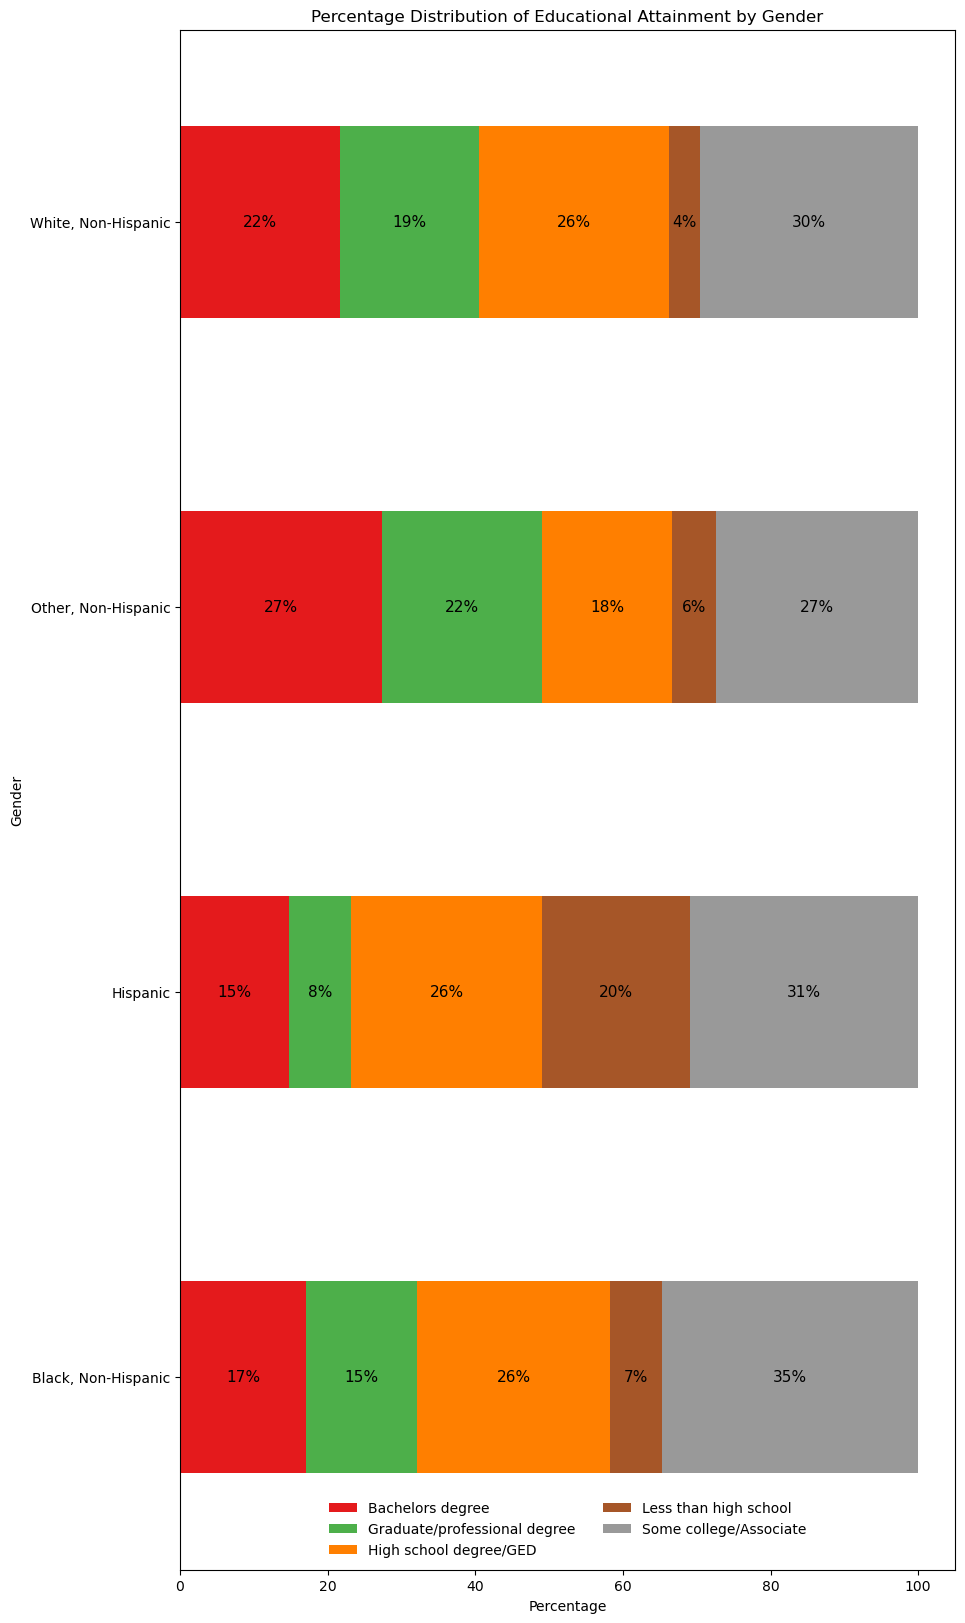

In [367]:
pivot_table2 = edu_count_race.pivot_table(values="Percentage", index="PPETHM", columns=["PPEDUC"], aggfunc=sum)
pivot_table2

pivot_table2.plot(kind='barh',
                 stacked=True ,
                 colormap='Set1',
                 figsize=(10, 20),
                mark_right = True)

# Calculate the total count for each category
df_total = pivot_table2["Bachelors degree"] + pivot_table2["Graduate/professional degree"] + \
           pivot_table2["High school degree/GED"] + pivot_table2["Less than high school"] + \
           pivot_table2["Some college/Associate"]

# Calculate relative percentages
df_rel = pivot_table2.div(df_total, axis=0) * 100

# Iterate over each category
for n in df_rel.columns: 
    # Iterate over each row
    for i, (cs, ab, pc) in enumerate(zip(df_rel.cumsum(axis=1)[n], pivot_table2[n], df_rel[n])): 
        # Add text annotations to the plot
        plt.text(cs - ab / 2, i, f"{pc:.0f}%", va='center', ha='center',fontsize=11)
        
plt.xlabel("Percentage")
plt.ylabel("Gender")  # Swap labels for horizontal bar chart
plt.title("Percentage Distribution of Educational Attainment by Gender")
plt.legend(frameon=False, loc='lower center', ncol=2)

